In [209]:
import pandas as pd


In [210]:
lats = pd.read_csv("lats.csv")
lats.columns.values[0] = "Latitude"
print(lats.shape)

(2020, 1)


In [211]:

# with open("lats.csv") as f:
#     reader = csv.reader(f)
#     for row in reader:
#         print(" ".join(row))

In [212]:
lons = pd.read_csv("lons.csv")
lons.columns.values[0] = "Longitude"
print(lons)

       Longitude
0    -112.149609
1    -112.149217
2    -112.148826
3    -112.148435
4    -112.148043
...          ...
1144 -111.701957
1145 -111.701565
1146 -111.701174
1147 -111.700783
1148 -111.700391

[1149 rows x 1 columns]


In [213]:
lons.loc[len(lons.index)] = -1.116999913043478320e+02

In [214]:
print(lons.shape)

(1150, 1)


In [215]:
o3 = pd.read_csv("o3.csv")
# o3.iloc
# display(o3)

In [216]:
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import numpy as np

In [228]:
# plt.contourf(lats, lons, o3, cmap = 'jet') # plt.plot(x_, lons, marker='o', color='k', linestyle='none')
# plt.show()
x_1, y_1 = np.meshgrid(lons, lats)
# print(x_1)
print(x_1.shape)
print(y_1.shape)
print(o3.shape)

(2020, 1150)
(2020, 1150)
(2020, 1150)


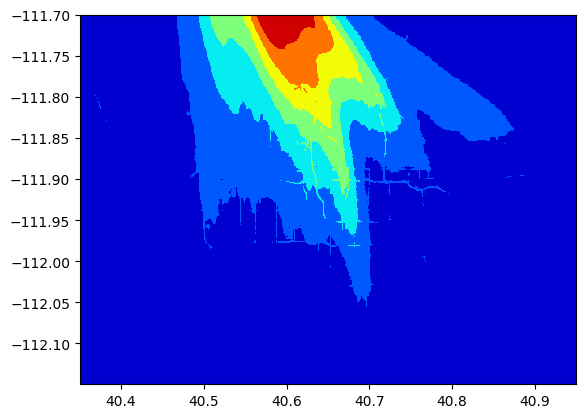

In [218]:
plt.contourf(y_1, x_1, o3, cmap = 'jet')
# plt.plot(x_1, y_1, marker='o', color='k', linestyle='none')


### Combining all three into one df

In [219]:
display(o3)

,1.857888603210449219e+01,1.857888603210449219e+01.1,1.857888603210449219e+01.2,1.857888603210449219e+01.3,1.857888603210449219e+01.4,1.857888603210449219e+01.5,1.857888603210449219e+01.6,1.857888603210449219e+01.7,1.857888603210449219e+01.8,1.857888603210449219e+01.9,...,1.857888603210449219e+01.906,1.857888603210449219e+01.907,1.857888603210449219e+01.908,1.857888603210449219e+01.909,1.857888603210449219e+01.910,1.857888603210449219e+01.911,1.857888603210449219e+01.912,1.857888603210449219e+01.913,1.857888603210449219e+01.914,1.857888603210449219e+01.915
0,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,...,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886
1,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,...,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886
2,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,...,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886
3,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,...,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886
4,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,...,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886,18.578886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,18.788506,18.788506,18.788506,18.788506,18.788506,18.788506,18.788506,18.788506,18.788506,18.788506,...,21.094326,21.094326,21.094326,21.094326,21.094326,21.094326,21.094326,21.094326,21.094326,21.094326
2016,18.788506,18.788506,18.788506,18.788506,18.788506,18.788506,18.788506,18.788506,18.788506,18.788506,...,21.094326,21.094326,21.094326,21.094326,21.094326,21.094326,21.094326,21.094326,21.094326,21.094326
2017,18.788506,18.788506,18.788506,18.788506,18.788506,18.788506,18.788506,18.788506,18.788506,18.788506,...,21.094326,21.094326,21.094326,21.094326,21.094326,21.094326,21.094326,21.094326,21.094326,21.094326
2018,18.788506,18.788506,18.788506,18.788506,18.788506,18.788506,18.788506,18.788506,18.788506,18.788506,...,21.094326,21.094326,21.094326,21.303947,21.094326,21.094326,21.094326,21.094326,21.094326,21.094326


In [220]:
df = o3.to_numpy()

In [221]:
import csv

def findLat(myLat):

    tempLat = 0

    # with open("lats.csv") as f:
    #     reader = csv.reader(f)
    #     for row in reader:
    #         print(" ".join(row))
    #         if (myLat > row):
    #             print("input is larger than" + row)
    count = 0
    for index, row in lats.iterrows():
        tempLat = row['Latitude']
        if (myLat < tempLat):
            # print("myLat is smaller than..." + str(tempLat))
            count += 1
        else:
            # print("We've passed over the threshold at" + str(tempLat) + " at index..." + str(count))
            return count
        # print(row['Latitude'])



In [222]:
def findLon(myLon):
    #[0] = -112
    #[1250] = -111
    tempLon = -113
    count = 0
    for index, row in lons.iterrows():
        tempLon = row['Longitude']
        if (tempLon < myLon):
            count += 1
            # print("myLon is greater than" + str(tempLon))

        else:
            # print("We've passed over the threshold at" + str(tempLon) + " at index..." + str(count))
            return count

In [223]:
findLon(-111.9719233)

455

In [224]:
findLat(40.7139467)

795

In [235]:
def findAQIAt(lat, lon):
    ### o3 is shaped as [lat][lon]
    #########[2020][1150]#########
    latIndex = findLat(lat)
    print("latIndex is..." + str(latIndex))
    lonIndex = findLon(lon)
    print("lonIndex is..." + str(lonIndex))

    print(o3.iloc[latIndex][lonIndex])



In [238]:
findAQIAt(40.95000000
, -112.15000000000)

latIndex is...0
lonIndex is...0
18.57888603210449


/var/folders/q5/c59x3w8x7fb7764t3_lb7g080000gn/T/ipykernel_31977/3111734743.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(o3.iloc[latIndex][lonIndex])
